In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Question:
    Is there a certain genre that has the highest sales?

## 1- Expectations:   
    - It's expected that in video games, There is a genre that is much preferred by the users than
      others and has the highest sales.

## 2- Data Collection: 
    

## Read data 

In [2]:
df = read_data(kind='dataset')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## Handle Missing Values
    - Dropping rows with missing values is not the best approach here, as shown in the Data Exploration section.
    - We will perform mode imputation for categorical features and KNN imputation for numerical features, since we
      are interested in exploring   the sales' features.

In [3]:
df= handle_missing_values(df, handling_method='mode_knn', neighbors=5)

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 0


## Handle outliers

In [4]:
df= remove_common_outliers(df,['NA_Sales','EU_Sales','JP_Sales'],)
print('Number of original rows: ', df.shape[0])

Number of outliers removed: 4445
Number of original rows:  12274


- This is safer than removing 10317 rows (As shown in Data Exploration section)

## EDA

### Genre Distribution

In [5]:
genres=df['Genre'].value_counts()
genres

Action          2555
Sports          1650
Misc            1373
Adventure       1139
Racing           954
Shooter          942
Role-Playing     879
Simulation       660
Platform         605
Fighting         552
Strategy         512
Puzzle           453
Name: Genre, dtype: int64

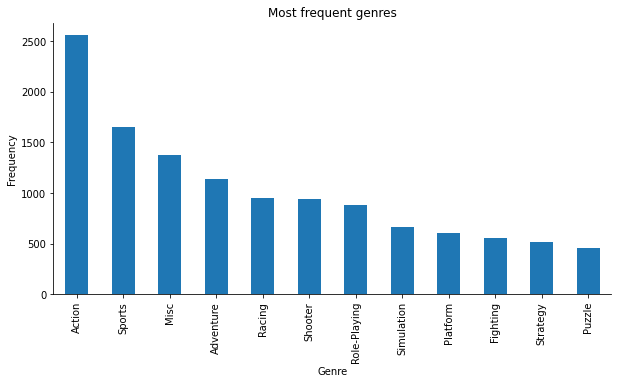

In [6]:
genres.plot(kind='bar', figsize=(10,5))

sns.despine(left=False, bottom=False)
plt.title('Most frequent genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

    - As shown Action genre is the top frequent genre in the dataset, followed by Sports and Misc genres.
    - Let's see will the action genre be the top selling genre or not. 

### Sales Distribution

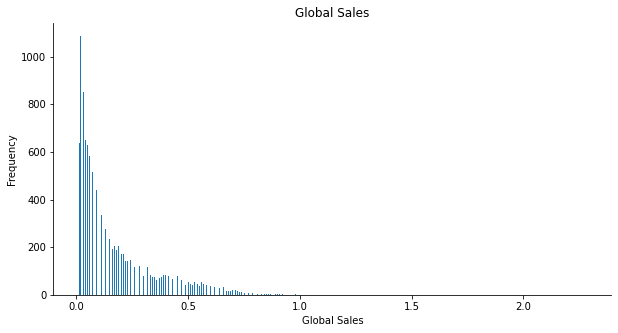

In [17]:
# plot histogram for global sales with bins= ceil(n/25)
n = df.shape[0]
bins = int(np.ceil(n/20))
df['Global_Sales'].plot(kind='hist', figsize=(10,5), bins=bins)
plt.title('Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
sns.despine(left=False, bottom=False)
plt.show()


    - As shown in the figure, the sales are in the range [0, 0.5] million dollars.

### Average Sales for each genre

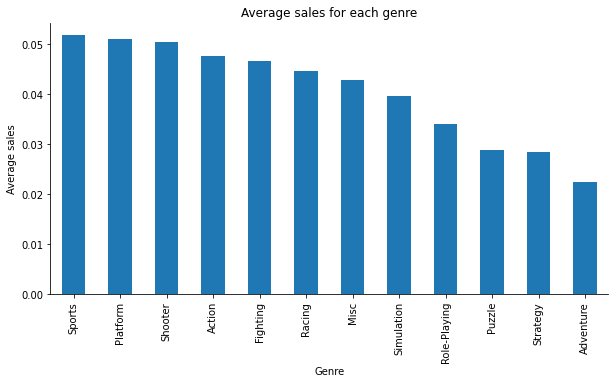

In [8]:
df_genre = df.groupby('Genre').mean(numeric_only=True)
df_genre['Total_Sales'] = df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean(axis=1)
df_genre = df_genre.sort_values(by='Total_Sales', ascending=False)
df_genre['Total_Sales'].plot(kind='bar', figsize=(10,5))

sns.despine(left=False, bottom=False)
plt.grid(False)
plt.title('Average sales for each genre')
plt.xlabel('Genre')
plt.ylabel('Average sales')
plt.show()

    - Genres from Sports to Fighting have almost the same average sales.

### Summary for average sales for each genre

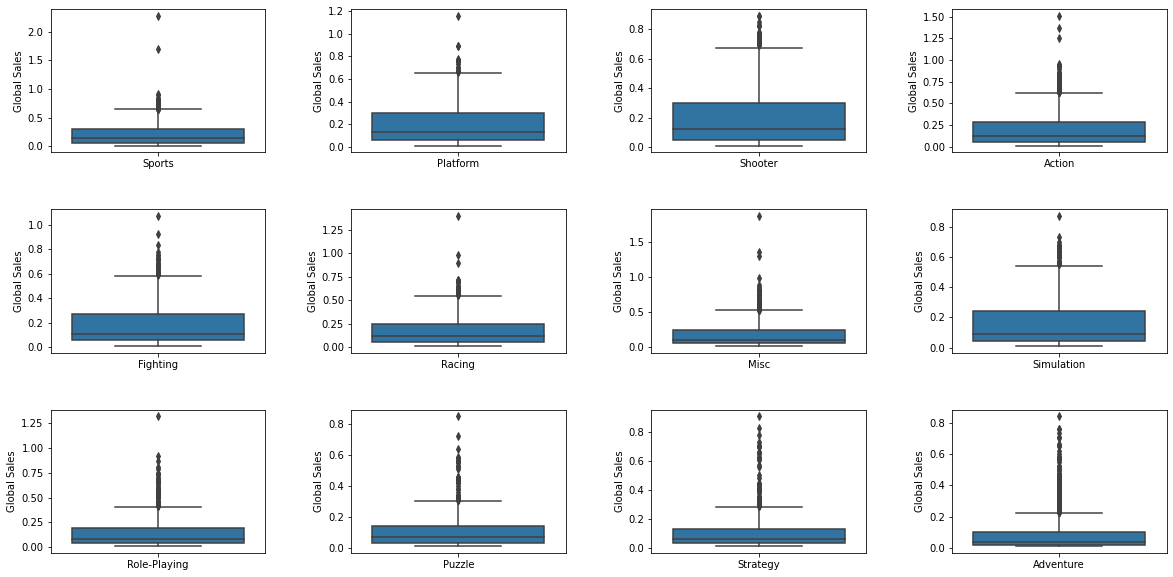

In [9]:
genres_summary=df.groupby('Genre')['Global_Sales'].describe().sort_values(by='mean', ascending=False)

# draw a boxplot to show distributions with respect to categories.
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (idx, row) in enumerate(genres_summary.iterrows()):
    ax = axes[int(i/4), i%4]
    sns.boxplot(x='Genre', y='Global_Sales', data=df[df['Genre']==idx], ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Global Sales')
    ax.grid(False)

In [10]:
genres_summary

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Sports,1650.0,0.207497,0.190581,0.01,0.06,0.14,0.30,2.28
Platform,605.0,0.204512,0.188529,0.01,0.06,0.13,0.30,1.16
Shooter,942.0,0.202346,0.195428,0.01,0.05,0.12,0.30,0.89
Action,2555.0,0.191198,0.186796,0.01,0.05,0.12,0.28,1.51
Fighting,552.0,0.186413,0.186754,0.01,0.06,0.11,0.27,1.07
Racing,954.0,0.178721,0.168939,0.01,0.05,0.12,0.25,1.40
Misc,1373.0,0.172017,0.180285,0.01,0.05,0.10,0.24,1.87
Simulation,660.0,0.159000,0.163422,0.01,0.04,0.09,0.24,0.87
Role-Playing,879.0,0.136246,0.153386,0.01,0.04,0.08,0.19,1.32


    - Sports seem to have the highest values for outliers therefor it has the highest average sales.

## 3- Comparing Expectations to data:
    - Sports genre has the highest sales as shown in the plots, so the expectations match the data.
        